## **Propose a categorization of the different customers**

## **Librerias**

In [39]:
!pip install kneed

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


## **Carga de datos**

In [151]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fraud_data_complete_final.csv")
data = data.drop(data.columns[0], axis=1)
data.head(7)

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345633,2020-01-21,20,ANDROID,Super,Merida,Fisica,71000.0,51.0,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,ANDROID,MPago,Merida,Virtual,71000.0,51.0,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,ANDROID,MPago,Guadalajara,Virtual,94000.0,56.0,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,WEB,MPago,Guadalajara,Fisica,94000.0,56.0,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,ANDROID,Farmacia,Guadalajara,Fisica,94000.0,56.0,Aceptada,False,0.000000,2.541711,False
5,1,F,37.003747,2020-01-27,3,ANDROID,MPago,Guadalajara,Fisica,94000.0,56.0,Rechazada,False,0.000000,0.370037,False
6,1,F,334.516017,2020-01-06,2,ANDROID,Abarrotes,Guadalajara,Fisica,94000.0,56.0,Aceptada,False,33.451602,3.010644,False


In [152]:
data_features = ['genero','dispositivo', 'establecimiento','ciudad', 'tipo_tc', 'linea_tc', 'interes_tc', 'is_prime', 'fraude']
data_customer = data[data_features]
data_customer

,genero,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,is_prime,fraude
0,F,ANDROID,Super,Merida,Fisica,71000.0,51.0,False,False
1,F,ANDROID,MPago,Merida,Virtual,71000.0,51.0,False,False
2,F,ANDROID,MPago,Guadalajara,Virtual,94000.0,56.0,False,False
3,F,WEB,MPago,Guadalajara,Fisica,94000.0,56.0,False,False
4,F,ANDROID,Farmacia,Guadalajara,Fisica,94000.0,56.0,False,False
...,...,...,...,...,...,...,...,...,...
6904,M,WEB,Farmacia,Merida,Virtual,94000.0,45.0,False,False
6905,M,ANDROID,Farmacia,Merida,Virtual,94000.0,45.0,False,True
6906,M,WEB,Super,Merida,Fisica,94000.0,45.0,False,False
6907,M,ANDROID,MPago,Monterrey,Fisica,94000.0,45.0,False,False


## **One-hot encoding y Estandarización**

In [153]:
numeric_cols = data_customer.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = data_customer.select_dtypes(include=['object', 'category', 'bool']).columns.to_list()

In [154]:
cat_cols

['genero',
 'dispositivo',
 'establecimiento',
 'ciudad',
 'tipo_tc',
 'is_prime',
 'fraude']

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector
# Se estandarizan las columnas numéricas y se codifican las categoricas

for i in data_customer[cat_cols]:
  labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
  data_customer[f'{i}_Types'] = labelencoder.fit_transform(data_customer[i])

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)
                    ],
                remainder='passthrough')

data_prep_customer = preprocessor.fit_transform(data_customer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [157]:
data_prep_customer = pd.DataFrame(data_prep_customer)

In [158]:
data_prep_customer.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.377875,0.322654,F,ANDROID,Super,Merida,Fisica,False,False,1,0,4,1,0,0,0
1,0.377875,0.322654,F,ANDROID,MPago,Merida,Virtual,False,False,1,0,2,1,1,0,0
2,1.41521,0.846337,F,ANDROID,MPago,Guadalajara,Virtual,False,False,1,0,2,0,1,0,0


In [161]:
data_prep_customer.columns = ["linea_tc", "interes_tc", "genero", "dispositivo", "establecimiento", 
                              "ciudad", 'tipo_tc', 'is_prime', 'fraude', 'genero_Types','dispositivo_Types', 'establecimiento_Types', 'ciudad_Types',
                              'tipo_tc_Types', 'is_prime_Types', 'fraude_Types'
                              ]
data_prep_customer.head(3)                              

,linea_tc,interes_tc,genero,dispositivo,establecimiento,ciudad,tipo_tc,is_prime,fraude,genero_Types,dispositivo_Types,establecimiento_Types,ciudad_Types,tipo_tc_Types,is_prime_Types,fraude_Types
0,0.377875,0.322654,F,ANDROID,Super,Merida,Fisica,False,False,1,0,4,1,0,0,0
1,0.377875,0.322654,F,ANDROID,MPago,Merida,Virtual,False,False,1,0,2,1,1,0,0
2,1.41521,0.846337,F,ANDROID,MPago,Guadalajara,Virtual,False,False,1,0,2,0,1,0,0


## **Número óptimo de clústeres**

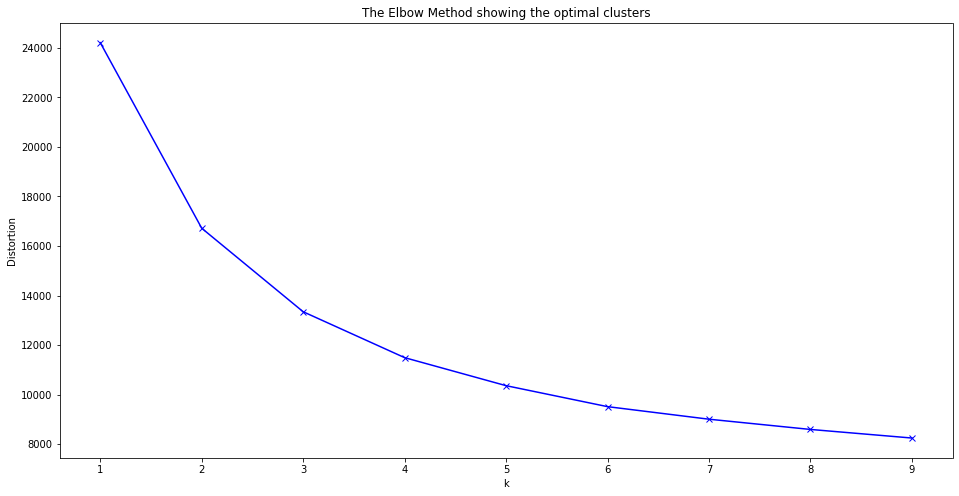

In [162]:
c = ['genero_Types','dispositivo_Types', 'establecimiento_Types', 'ciudad_Types', 'tipo_tc_Types', 'is_prime_Types']

# recoletcar las distorsiones
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(data_prep_customer[c])
 distortions.append(kmeanModel.inertia_)# graficando las distorsiones
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

## **KMEANS**

In [163]:
#Taking 4 clusters
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(data_prep_customer[c])
#predicting the labels of the input data
y=km1.predict(data_prep_customer[c])
#adding the labels to a column named label
data_prep_customer["label"] = y
#The new dataframe with the clustering done
data_prep_customer.head()

,linea_tc,interes_tc,genero,dispositivo,establecimiento,ciudad,tipo_tc,is_prime,fraude,genero_Types,dispositivo_Types,establecimiento_Types,ciudad_Types,tipo_tc_Types,is_prime_Types,fraude_Types,label
0,0.377875,0.322654,F,ANDROID,Super,Merida,Fisica,False,False,1,0,4,1,0,0,0,2
1,0.377875,0.322654,F,ANDROID,MPago,Merida,Virtual,False,False,1,0,2,1,1,0,0,0
2,1.41521,0.846337,F,ANDROID,MPago,Guadalajara,Virtual,False,False,1,0,2,0,1,0,0,0
3,1.41521,0.846337,F,WEB,MPago,Guadalajara,Fisica,False,False,1,1,2,0,0,0,0,0
4,1.41521,0.846337,F,ANDROID,Farmacia,Guadalajara,Fisica,False,False,1,0,1,0,0,0,0,3


## **Categorización de los customers: Visualizacion de los clusteres**

### Primer cluster de customers

In [164]:
costumer_cluster1 = data_prep_customer[data_prep_customer['label']==0]
len(costumer_cluster1)

1941

Text(0.5, 1.0, 'Fraude en cluster 1')

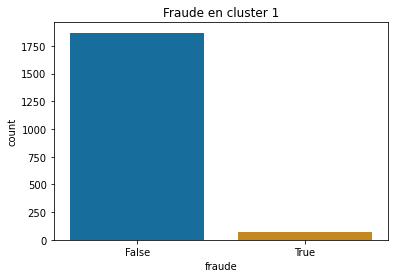

In [172]:
sns.countplot(x='fraude', data = costumer_cluster1, palette='colorblind')
plt.title("Fraude en cluster 1")

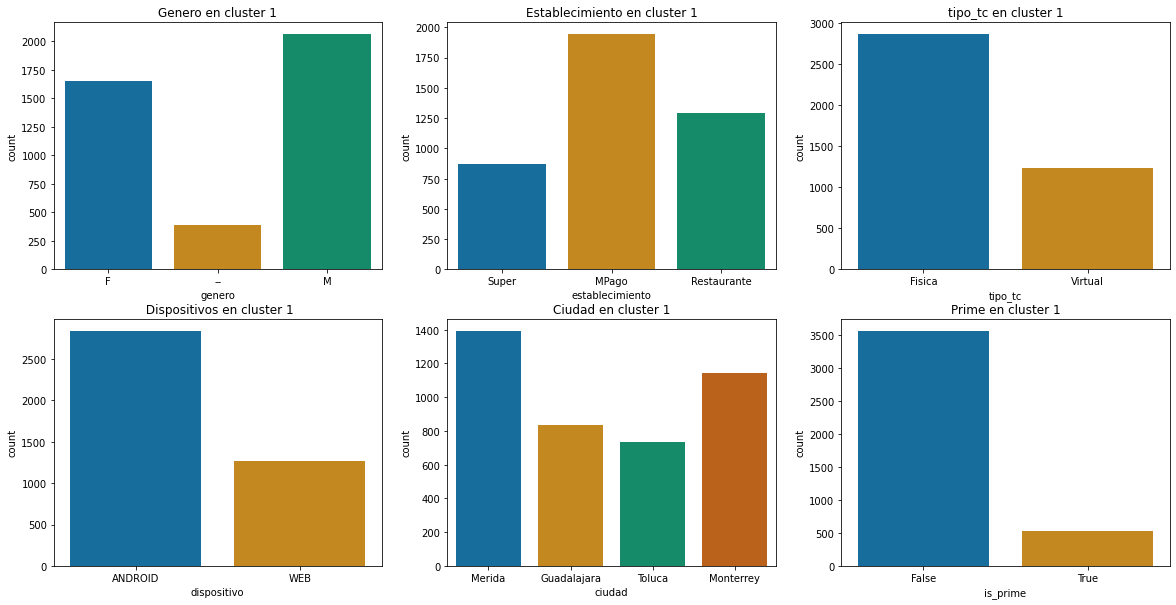

In [125]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

sns.countplot(x='genero', data = costumer_cluster1, palette='colorblind',ax=ax[0][0])
ax[0][0].set_title("Genero en cluster 1")
sns.countplot(x='dispositivo', data = costumer_cluster1, palette='colorblind',ax=ax[1][0])
ax[1][0].set_title('\n Dispositivos en cluster 1')
sns.countplot(x='establecimiento', data = costumer_cluster1, palette='colorblind',ax=ax[0][1])
ax[0][1].set_title('Establecimiento en cluster 1');
sns.countplot(x='ciudad', data = costumer_cluster1, palette='colorblind',ax=ax[1][1])
ax[1][1].set_title('Ciudad en cluster 1');
sns.countplot(x='tipo_tc', data = costumer_cluster1, palette='colorblind',ax=ax[0][2])
ax[0][2].set_title('tipo_tc en cluster 1');
sns.countplot(x='is_prime', data = costumer_cluster1, palette='colorblind',ax=ax[1][2])
ax[1][2].set_title('Prime en cluster 1');

- Se puede visualizar que en este cluster hay cierta diferencia en la proporcion de genero de clientes, con mayor predominancia de los varones.
- Asimismo, mayor frecuencia de hacer trasferencias en ciertos establecimientos como MPago, restaurante y super.
- Y presenta la mayor cantidad de transferencias de tipo física, uso de dispositivo android y clientes prime en todos los clusteres.


### Segundo cluster de customers

In [174]:
costumer_cluster2 = data_prep_customer[data_prep_customer['label']==1]
len(costumer_cluster2)

2140

Text(0.5, 1.0, 'Fraude en cluster 2')

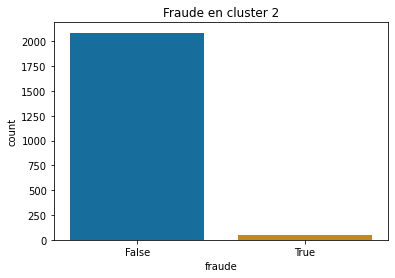

In [175]:
sns.countplot(x='fraude', data = costumer_cluster2, palette='colorblind')
plt.title("Fraude en cluster 2")

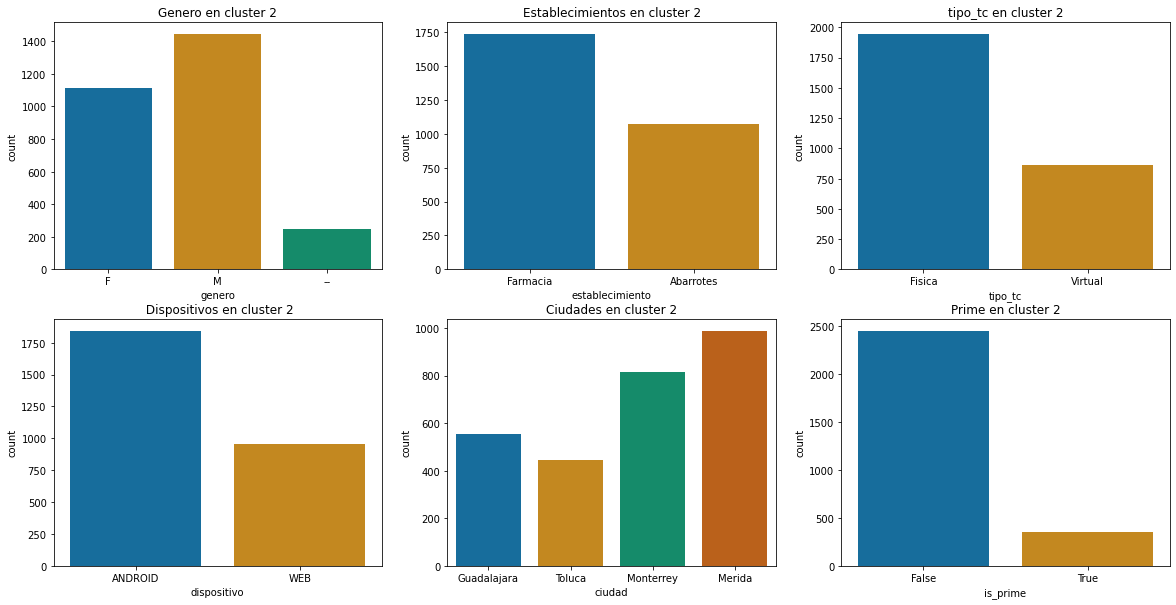

In [127]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

sns.countplot(x='genero', data = costumer_cluster2, palette='colorblind',ax=ax[0][0])
ax[0][0].set_title("Genero en cluster 2")
sns.countplot(x='dispositivo', data = costumer_cluster2, palette='colorblind',ax=ax[1][0])
ax[1][0].set_title('\n Dispositivos en cluster 2')
sns.countplot(x='establecimiento', data = costumer_cluster2, palette='colorblind',ax=ax[0][1])
ax[0][1].set_title('Establecimientos en cluster 2');
sns.countplot(x='ciudad', data = costumer_cluster2, palette='colorblind',ax=ax[1][1])
ax[1][1].set_title('Ciudades en cluster 2');
sns.countplot(x='tipo_tc', data = costumer_cluster2, palette='colorblind',ax=ax[0][2])
ax[0][2].set_title('tipo_tc en cluster 2');
sns.countplot(x='is_prime', data = costumer_cluster2, palette='colorblind',ax=ax[1][2])
ax[1][2].set_title('Prime en cluster 2');

- En el cluster 2 tambien hay cierta diferencia de genero de clientes, con mayor predominancia de los varones.
- Asimismo, mayor frecuencia de hacer trasferencias en establecimientos como Farmacias y abarrotes.
- A diferencias del anterior y demas clusteres aqui se observa menos casos de fraude.

### Tecer cluster de customers

In [177]:
costumer_cluster3 = data_prep_customer[data_prep_customer['label']==2]
len(costumer_cluster3)

1285

Text(0.5, 1.0, 'Fraude en cluster 3')

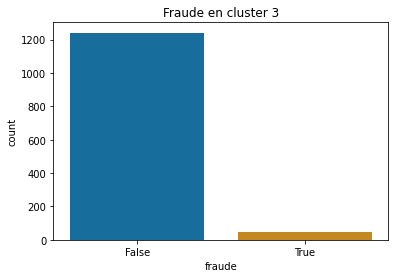

In [178]:
sns.countplot(x='fraude', data = costumer_cluster3, palette='colorblind')
plt.title("Fraude en cluster 3")

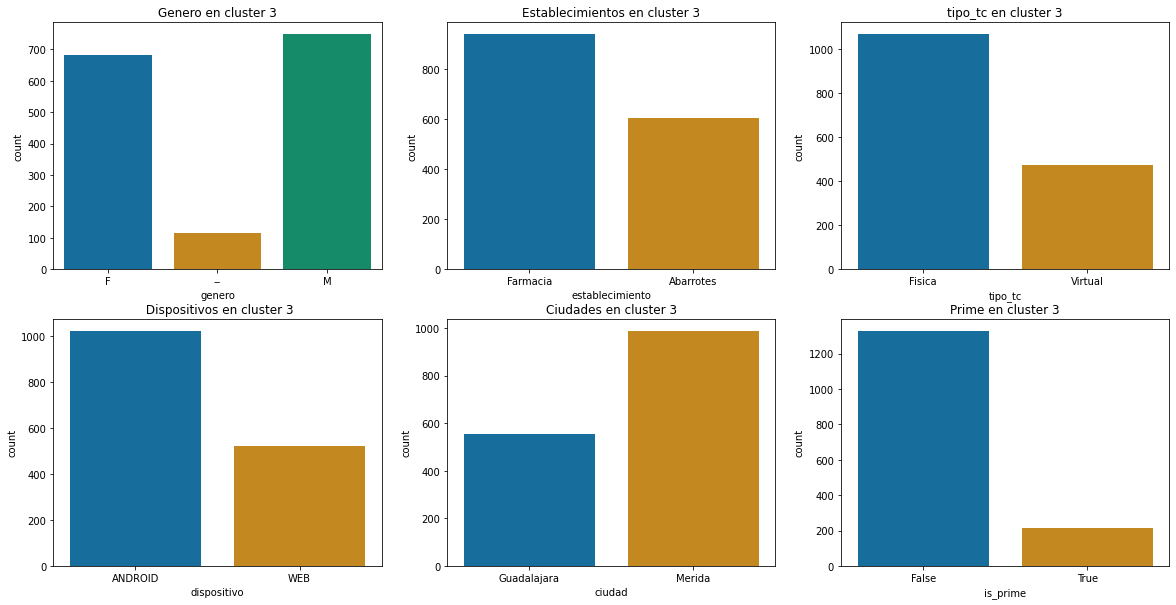

In [112]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

sns.countplot(x='genero', data = costumer_cluster3, palette='colorblind',ax=ax[0][0])
ax[0][0].set_title("Genero en cluster 3")
sns.countplot(x='dispositivo', data = costumer_cluster3, palette='colorblind',ax=ax[1][0])
ax[1][0].set_title('\n Dispositivos en cluster 3')
sns.countplot(x='establecimiento', data = costumer_cluster3, palette='colorblind',ax=ax[0][1])
ax[0][1].set_title('Establecimientos en cluster 3');
sns.countplot(x='ciudad', data = costumer_cluster3, palette='colorblind',ax=ax[1][1])
ax[1][1].set_title('Ciudades en cluster 3');
sns.countplot(x='tipo_tc', data = costumer_cluster3, palette='colorblind',ax=ax[0][2])
ax[0][2].set_title('tipo_tc en cluster 3');
sns.countplot(x='is_prime', data = costumer_cluster3, palette='colorblind',ax=ax[1][2])
ax[1][2].set_title('Prime en cluster 3');

- En el cluster 3 tambien se disminuye la diferencia de genero en los clientes.
- Asimismo, mayor frecuencia de hacer trasferencias en establecimientos como Farmacias y abarrotes.
- A diferencias del anterior y demas clusteres aqui solo son clientes en las ciudades de Guadalajara y Merida.
- Asimismo presenta la menor cantidad de clientes prime en todos los clusteres.

### Cuarto cluster de customers

In [179]:
costumer_cluster4 = data_prep_customer[data_prep_customer['label']==3]
len(costumer_cluster4)

1543

Text(0.5, 1.0, 'Fraude en cluster 4')

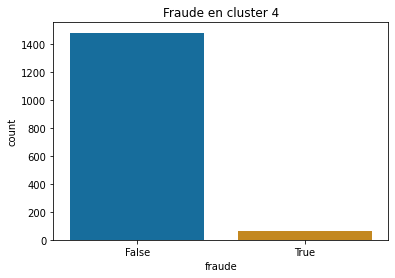

In [180]:
sns.countplot(x='fraude', data = costumer_cluster4, palette='colorblind')
plt.title("Fraude en cluster 4")

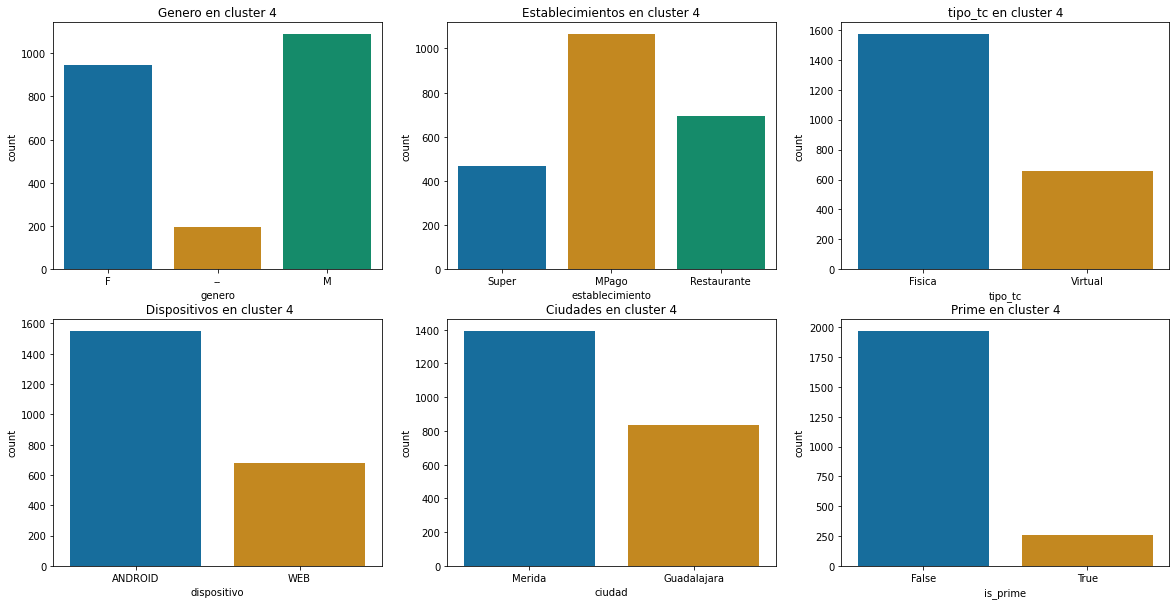

In [113]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

sns.countplot(x='genero', data = costumer_cluster4, palette='colorblind',ax=ax[0][0])
ax[0][0].set_title("Genero en cluster 4")
sns.countplot(x='dispositivo', data = costumer_cluster4, palette='colorblind',ax=ax[1][0])
ax[1][0].set_title('\n Dispositivos en cluster 4')
sns.countplot(x='establecimiento', data = costumer_cluster4, palette='colorblind',ax=ax[0][1])
ax[0][1].set_title('Establecimientos en cluster 4');
sns.countplot(x='ciudad', data = costumer_cluster4, palette='colorblind',ax=ax[1][1])
ax[1][1].set_title('Ciudades en cluster 4');
sns.countplot(x='tipo_tc', data = costumer_cluster4, palette='colorblind',ax=ax[0][2])
ax[0][2].set_title('tipo_tc en cluster 4');
sns.countplot(x='is_prime', data = costumer_cluster4, palette='colorblind',ax=ax[1][2])
ax[1][2].set_title('Prime en cluster 4');

- En el cluster 4 tambien se disminuye la diferencia de genero en los clientes.
- Asimismo, mayor frecuencia de hacer trasferencias en establecimientos como MPago, abarrotes y super.
- Y solo se encuentran clientes en las ciudades de Guadalajara y Merida.
- Asimismo presenta pocos clientes prime respecto a los demas clusteres.

### Conclusion

- Se puede categorizar a los clientes, tomando en cuenta el analisis de los clusteres, con los tipos de establecimiento, las ciudades, diferencia de genero y la diferencia en cantidad de clientes prime.
- Respecto a las demás variables no se encuentran diferencias con los demas clusteres, pues, se mantiene o es cercana la proporcion en los distintos clausteres, ya sea entre los dispositivos, la proporcion entre los tipos_tc o los casos de fraude.